In [18]:
from skfuzzy import control as ctrl
from fuzzify import *
import skfuzzy as fuzz
import numpy as np

%matplotlib notebook


class washing_machine:

    degree_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'degree_dirt')
    type_dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'type_dirt')
    wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')

    degree_names = ['Low', 'Medium', 'High']
    type_names = ['NonFat', 'Medium', 'Fat']

    #Outputing them into auto-membership functions
    degree_dirt.automf(names=degree_names)
    type_dirt.automf(names=type_names)

    # Washing Time Universe
    wash_time['VeryShort'] = fuzz.trimf(wash_time.universe, [0, 8, 12])
    wash_time['Short'] = fuzz.trimf(wash_time.universe, [8, 12, 20])
    wash_time['Medium'] = fuzz.trimf(wash_time.universe, [12, 20, 40])
    wash_time['Long'] = fuzz.trimf(wash_time.universe, [20, 40, 60])
    wash_time['VeryLong'] = fuzz.trimf(wash_time.universe, [40, 60, 60])

    # Rule Application
    rule1 = ctrl.Rule(degree_dirt['High'] | type_dirt['Fat'], wash_time['VeryLong'])
    rule2 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Fat'], wash_time['Long'])
    rule3 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Fat'], wash_time['Long'])
    rule4 = ctrl.Rule(degree_dirt['High'] | type_dirt['Medium'], wash_time['Long'])
    rule5 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['Medium'], wash_time['Medium'])
    rule6 = ctrl.Rule(degree_dirt['Low'] | type_dirt['Medium'], wash_time['Medium'])
    rule7 = ctrl.Rule(degree_dirt['High'] | type_dirt['NonFat'], wash_time['Medium'])
    rule8 = ctrl.Rule(degree_dirt['Medium'] | type_dirt['NonFat'], wash_time['Short'])
    rule9 = ctrl.Rule(degree_dirt['Low'] | type_dirt['NonFat'], wash_time['VeryShort'])

    # Washing Control Simulation
    washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
    washing = ctrl.ControlSystemSimulation(washing_ctrl)

    
def fuzzify_laundry(fuzz_type,fuzz_degree):

    washing_machine.washing.input['type_dirt'] = fuzz_type
    washing_machine.washing.input['degree_dirt'] = fuzz_degree

    washing_machine.washing.compute()

    washing_machine.wash_time.view(sim=washing_machine.washing)

    return washing_machine.washing.output['wash_time']

Enter Type of Dirtiness [0-100] : 50
Enter Degree of Dirtiness [0-100] : 68


<IPython.core.display.Javascript object>


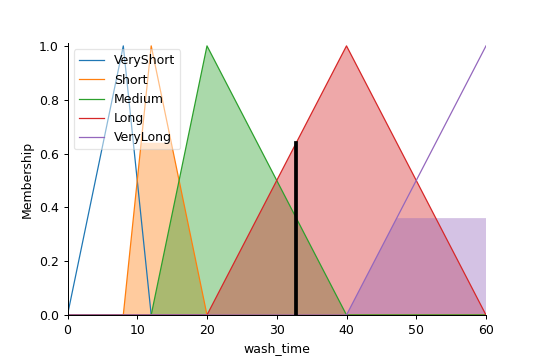

32.7886891153378


In [19]:
def compute_washing_parameters(type_of_dirt,degree_of_dirt):

    if type_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Type of Dirtiness: %lf" %type_of_dirt)
    if degree_of_dirt < 0.0 or type_of_dirt > 100.0:
        raise Exception("Invalid Degree of Dirtiness: %lf" %degree_of_dirt)

    type_fuzzy = fuzzify_laundry(type_of_dirt,degree_of_dirt)

    return type_fuzzy


if __name__ == "__main__":
    type_of_dirt = float(input("Enter Type of Dirtiness [0-100] : "))
    degree_of_dirt = float(input("Enter Degree of Dirtiness [0-100] : "))
    washing_parameters = compute_washing_parameters(type_of_dirt,degree_of_dirt)
    print(washing_parameters)